In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from textblob import TextBlob, Word

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

/Users/jamilab/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# create df

df = pd.read_csv('/Users/jamilab/Data_Science/Data_Sets/hillary-clinton-emails/Emails.csv')
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [3]:
df['ExtractedFrom'].unique()

array(['Sullivan, Jacob J <Sullivan11@state.gov>', nan,
       'Mills, Cheryl D <MillsCD@state.gov>',
       'Sullivan, Jacob J <Sullivanli@stategov>',
       'Sullivan, Jacob 1 <Sullivan)) state.gov>',
       'Sullivan, Jacob J <SullivanJJ@state.gov>',
       'Mills, Cheryl 0 <MillsCD@state.gov›',
       'Koh, Harold Hongju <KohliFf@state.gov>',
       'Sherman, Wendy R <ShermanWR@state.gov>',
       'Sullivan, Jacobi <Sullivanii@state.gov>',
       'H <hrod17©clintonemaiLcom>', 'H <hrod17@clintonemail.com>',
       'Sullivan, Jacob .1 ‹Sullivann@state.gov>',
       'Sullivan, Jacob I <Sullivanit@state,gov›',
       'Mills, Cheryl 0 <MillsCD@stategov>', 'Burns Strider',
       'Abedin, Huma <AbedinH@state.goy>',
       'McDonough, Denis R. (mailto: B6',
       'Mills, Cheryl 0 <MillsCD@state.gov>',
       'Sullivan, Jacob .1 <Sullivarill@state.gov>',
       'Russo, Robert V <RussoRV©state.gov>',
       'Abeclin, Huma <AbedinH@state.gov>',
       'Sullivan, Jacobi <SullivanJJOstate.goy

In [4]:
df = df.dropna(subset=['ExtractedBodyText'], how='any')

In [5]:
df['ExtractedBodyText'].isnull().sum()

0

In [6]:
df['From_Hilary'] = np.where(df['MetadataFrom'] == 'H', 1, 0)

In [7]:
columns = ['ExtractedBodyText', 'From_Hilary']

In [8]:
ebt = df[columns]
ebt.shape

(6742, 2)

In [9]:
ebt.isnull().sum()

ExtractedBodyText    0
From_Hilary          0
dtype: int64

In [10]:
# define X and y
X = ebt.ExtractedBodyText
y = ebt.From_Hilary
print(y.value_counts())

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

0    4931
1    1811
Name: From_Hilary, dtype: int64


In [11]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [12]:
X_train.head()

360              Can I fit in a visit at the State Dept??
366                                            Pls print.
3905    Folks,\nI've attached the latest draft of the ...
4197    Sullivan, Jacob i <Sullivanil@state.gov>\nThur...
1128                                    Were these added?
Name: ExtractedBodyText, dtype: object

In [13]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(5056, 205731)
(1686, 205731)


In [14]:
# first 50 features
print(vect.get_feature_names()[:50])

['00', '00 046', '00 11', '00 13', '00 143', '00 15', '00 258', '00 30', '00 351', '00 404', '00 440', '00 48', '00 56', '00 589', '00 603', '00 7th', '00 873', '00 922', '00 964', '00 990', '00 acs', '00 affairs', '00 approximately', '00 arrive', '00 bai3acan', '00 bilat', '00 bilateral', '00 breakfast', '00 chair', '00 conference', '00 coordinator', '00 dean', '00 depart', '00 deputy', '00 dimitrios', '00 early', '00 edt', '00 eleanor', '00 en', '00 experience', '00 following', '00 food', '00 funeral', '00 haiti', '00 hamad', '00 hold', '00 hst', '00 html', '00 iv', '00 jacobson']


In [15]:
# last 50 features
print(vect.get_feature_names()[-50:])

['zone international', 'zone issues', 'zone leadership', 'zone likely', 'zone make', 'zone nations', 'zone negotiability', 'zone north', 'zone organization', 'zone paris', 'zone partners', 'zone periphery', 'zone proves', 'zone providing', 'zone risk', 'zone said', 'zone security', 'zone suicide', 'zone timing', 'zone treasury', 'zone weeks', 'zones', 'zones aresecurity', 'zones aware', 'zones defined', 'zones didn', 'zones far', 'zones schools', 'zones west', 'zoo', 'zoo animals', 'zsu', 'zsu 23', 'zuckerman', 'zuckerman dinner', 'zuckerman praised', 'zuckerman publisher', 'zulciernain', 'zulciernain tahir', 'zuma', 'zuma add', 'zuma jibril', 'zuma making', 'zumbi', 'zumbi dos', 'zurich', 'zurich financial', 'zurich lisle', 'zzity', 'zzity ii']


In [16]:
# use logistic regression with document feature matrix, NOT the text column

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.845195729537


In [17]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train_dtm, y_train)
y_pred_class_tree = model.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class_tree))

0.79359430605


In [18]:
# TfidfVectorizer
tfvect = TfidfVectorizer()

In [19]:
# create a document-term matrix using TF-IDF
tfvect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(X_train)
features = vect.get_feature_names()
dtm.shape

(5056, 205731)

In [20]:
tfvect = TfidfVectorizer(stop_words='english')
print('Features: ', dtm.shape[1])
print('Accuracy: ', cross_val_score(logreg, dtm, y_train, cv=5, scoring='accuracy').mean())

Features:  205731
Accuracy:  0.831881321276


In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
svd = TruncatedSVD(n_components=5000)
svd.fit(dtm)

TruncatedSVD(algorithm='randomized', n_components=5000, n_iter=5,
       random_state=None, tol=0.0)

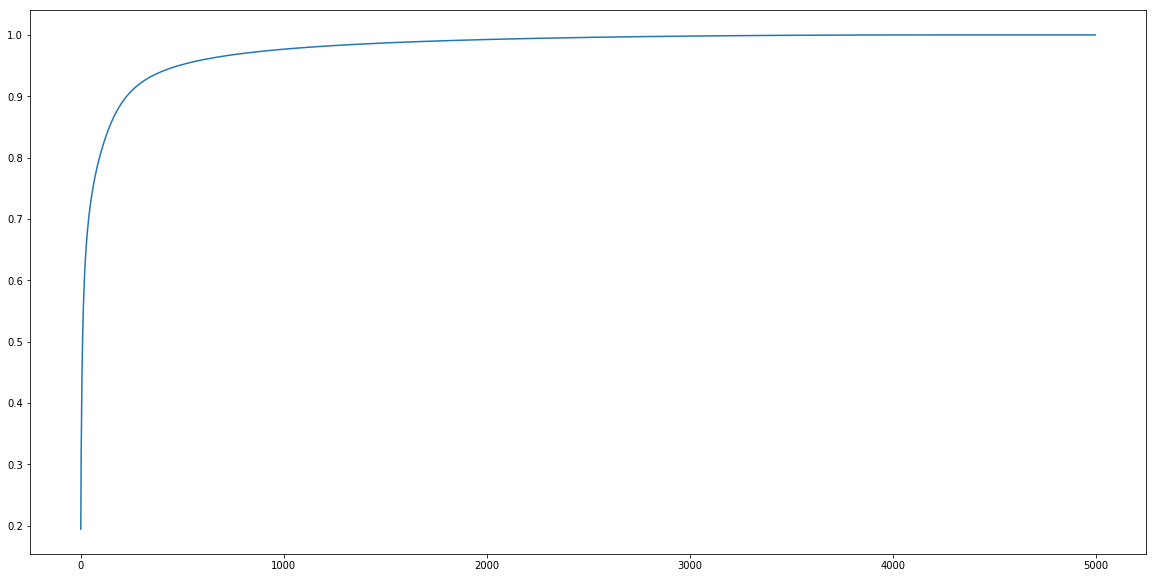

In [23]:
# scree plot

plt.plot(np.cumsum(svd.explained_variance_ratio_))

In [24]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
svd = TruncatedSVD(n_components=15)
normalizer = Normalizer()

In [25]:
# create lsa pipeline

from sklearn.pipeline import Pipeline
lsa = Pipeline(steps=[('tfidf', tfidf), ('svd', svd), ('normalizer', normalizer)])

In [26]:
lsa_X_train = lsa.fit_transform(X_train)
lsa_X_train.shape

(5056, 15)

In [28]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=15)
km.fit(lsa_X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
predicted_cluster = km.predict(lsa_X_train)
predicted_cluster

array([14, 10,  0, ...,  0,  3, 13], dtype=int32)

In [30]:
# distribution of topics

pd.Series(predicted_cluster).value_counts(normalize=True)

# create df of texts & predicted topics

texts_df = pd.DataFrame({'text':X_train, 'topic':predicted_cluster})
texts_df.head()

,text,topic
360,Can I fit in a visit at the State Dept??,14
366,Pls print.,10
3905,"Folks,\nI've attached the latest draft of the ...",0
4197,"Sullivan, Jacob i <Sullivanil@state.gov>\nThur...",2
1128,Were these added?,1


In [31]:
print('Top terms per cluster:')
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[ : , ::-1]
terms = lsa.steps[0][1].get_feature_names()

for i in range(15):
    print('Cluster %d:' %i)
    print(', '.join([terms[ind] for ind in order_centroids[i, :5]]))
lsa.steps[0][1]

Top terms per cluster:
Cluster 0:
talk, know, let, did, just
Cluster 1:
know, did, talk, let, just
Cluster 2:
gov, state gov, state, mills, cheryl
Cluster 3:
fyi, know, talk, let, did
Cluster 4:
ok, talk, know, let, did
Cluster 5:
thx, know, ok thx, did, pis
Cluster 6:
yes, know, talk, let, did
Cluster 7:
pm, office, 00, 30, secretary
Cluster 8:
b6, release, release b6, b5, b5 b6
Cluster 9:
pis print, pis, importance high, importance, print
Cluster 10:
pls print, pls, print, know, talk
Cluster 11:
lona, valmoro, state, lona valmoro, assistant secretary
Cluster 12:
clintonemail, clintonemail com, hrod17, hrod17 clintonemail, com
Cluster 13:
huma, abedin, abedin huma, state gov, gov
Cluster 14:
2015, state, benghazi, house, department


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)